In [ ]:
import numpy as np

# Step 1: Define Parameters for BBB-rated Company (including 's' and 'k')
params = {
    'V': 1.0,           # Normalized firm value
    'r': 0.04,          # Risk-free rate
    'tau': 0.21,        # Corporate tax rate
    'sigma': 0.22,      # Asset volatility
    'C': 0.05,          # Coupon payment
    'alpha': 0.1,       # EBITDA/firm value ratio
    'K': 4,             # Debt/EBITDA covenant ratio
    's': 0.12,           # Penalty for covenant violation
    'k': 0.05           # Covenant cost
}

# Step 2: Function to Compute 'x' (Depends on r and sigma)
def compute_x(params):
    return 2 * params['r'] / params['sigma']**2

# Step 3: Function to Compute V_g^* (Covenant Threshold)
def compute_V_g(params):
    x = compute_x(params)

    # Condition 2: Ensure 2r > sigma^2
    if 2 * params['r'] <= params['sigma']**2:
        raise ValueError(f"Condition violated: 2 * r must be greater than sigma^2. (2 * {params['r']} <= {params['sigma']**2})")

    V_g = params['V']**(x / (x + 1)) * ((params['k'] * params['r'] * (1 + x)) /
           (params['C'] * params['s'] * (1 - params['tau']) * x))**(1 / (x + 1))

    # Condition 1: Ensure V_g^* < 1
    if V_g >= 1:
        raise ValueError(f"Condition violated: V_g^* must be less than 1. Computed V_g^* = {V_g}")

    return V_g

# Step 4: Function to Compute D^* (Optimal Leverage Ratio)
def compute_D(V_g, params):
    D = params['K'] * params['alpha'] * V_g
    return D

# Step 5: Perform Computation with Validity Checks
try:
    V_g_star = compute_V_g(params)
    D_star = compute_D(V_g_star, params)

    print(f"V_g^* (Covenant Threshold): {V_g_star:.4f}")
    print(f"D^* (Optimal Leverage Ratio): {D_star:.4f}")
except ValueError as e:
    print(f"Error: {e}")




V_g^* (Covenant Threshold): 0.8634
D^* (Optimal Leverage Ratio): 0.3453


In [ ]:
import numpy as np

# Baseline parameters
baseline_params = {
    'V': 1.0,           # Normalized firm value
    'r': 0.04,          # Risk-free rate
    'tau': 0.21,        # Corporate tax rate
    'sigma': 0.22,      # Asset volatility
    'C': 0.05,          # Coupon payment
    'alpha': 0.1,       # EBITDA/firm value ratio
    'K': 4,             # Debt/EBITDA covenant ratio
    's': 0.12,          # Penalty for covenant violation
    'k': 0.05           # Covenant cost
}

# Function to compute x (depends on r and sigma)
def compute_x(params):
    return 2 * params['r'] / params['sigma']**2

# Function to compute V_g^* (covenant threshold)
def compute_V_g(params):
    x = compute_x(params)

    # Ensure 2r > sigma^2, return np.nan if violated
    if 2 * params['r'] <= params['sigma']**2:
        return np.nan

    V_g = params['V']**(x / (x + 1)) * ((params['k'] * params['r'] * (1 + x)) /
           (params['C'] * params['s'] * (1 - params['tau']) * x))**(1 / (x + 1))

    # Ensure V_g^* < 1, return np.nan if violated
    if V_g >= 1:
        return np.nan

    return V_g

# Function to compute D^* (optimal leverage ratio)
def compute_D(V_g, params):
    if np.isnan(V_g):
        return np.nan
    D = params['K'] * params['alpha'] * V_g
    return D

# Calculate baseline D*
V_g_star_baseline = compute_V_g(baseline_params)
D_star_baseline = compute_D(V_g_star_baseline, baseline_params)
print(f"Baseline D^* (Optimal Leverage Ratio): {D_star_baseline:.4f}")

# Function to calculate change in D* for a scenario
def scenario_analysis(scenario_params, baseline_params):
    # Compute new V_g and D based on adjusted scenario parameters
    V_g_star_new = compute_V_g(scenario_params)
    D_star_new = compute_D(V_g_star_new, scenario_params)
    # Compute percentage change from baseline
    if not np.isnan(D_star_new):
        change_in_D = ((D_star_new - D_star_baseline) / D_star_baseline) * 100
        return D_star_new, change_in_D
    else:
        return np.nan, np.nan

# Scenarios
scenarios = [
    {'name': 'Scenario 1: r increases to 5%', 'adjustments': {'r': 0.05}},
    {'name': 'Scenario 2: r decreases to 3%', 'adjustments': {'r': 0.03}},
    {'name': 'Scenario 3: Tax rate increases to 30%', 'adjustments': {'tau': 0.30}},
    {'name': 'Scenario 4: sigma increases to 25%', 'adjustments': {'sigma': 0.25}},
    {'name': 'Scenario 5: sigma decreases to 20%', 'adjustments': {'sigma': 0.20}},
    {'name': 'Scenario 6: alpha decreases to 0.08', 'adjustments': {'alpha': 0.08}},
    {'name': 'Scenario 7: alpha increases to 0.12', 'adjustments': {'alpha': 0.12}},
    {'name': 'Scenario 8: K increases to 5', 'adjustments': {'K': 5}},
    {'name': 'Scenario 9: K decreases to 3', 'adjustments': {'K': 3}},
    {'name': 'Scenario 10: C increases to 0.06', 'adjustments': {'C': 0.06}},
    {'name': 'Scenario 11: C decreases to 0.04', 'adjustments': {'C': 0.04}},
    {'name': 'Scenario 12: s increases to 0.2', 'adjustments': {'s': 0.2}},
    {'name': 'Scenario 13: s decreases to 0.1', 'adjustments': {'s': 0.1}},  # Updated
    {'name': 'Scenario 14: k decreases to 0.02', 'adjustments': {'k': 0.02}},
    {'name': 'Scenario 15: k increases to 0.07', 'adjustments': {'k': 0.07}}  # Updated
]

# Loop through scenarios
for scenario in scenarios:
    # Copy the baseline params and apply the scenario adjustments
    scenario_params = baseline_params.copy()
    scenario_params.update(scenario['adjustments'])

    # Perform analysis for the scenario
    D_star_new, change_in_D = scenario_analysis(scenario_params, baseline_params)

    # Print results
    if not np.isnan(D_star_new):
        print(f"{scenario['name']}:")
        print(f"New D^*: {D_star_new:.4f}, Change: {change_in_D:.2f}%\n")
    else:
        print(f"{scenario['name']}: Invalid scenario (condition violated)\n")


Baseline D^* (Optimal Leverage Ratio): 0.3453
Scenario 1: r increases to 5%:
New D^*: 0.3693, Change: 6.93%

Scenario 2: r decreases to 3%:
New D^*: 0.3116, Change: -9.76%

Scenario 3: Tax rate increases to 30%:
New D^*: 0.3615, Change: 4.66%

Scenario 4: sigma increases to 25%:
New D^*: 0.3529, Change: 2.19%

Scenario 5: sigma decreases to 20%:
New D^*: 0.3434, Change: -0.55%

Scenario 6: alpha decreases to 0.08:
New D^*: 0.2763, Change: -20.00%

Scenario 7: alpha increases to 0.12:
New D^*: 0.4144, Change: 20.00%

Scenario 8: K increases to 5:
New D^*: 0.4317, Change: 25.00%

Scenario 9: K decreases to 3:
New D^*: 0.2590, Change: -25.00%

Scenario 10: C increases to 0.06:
New D^*: 0.3224, Change: -6.64%

Scenario 11: C decreases to 0.04:
New D^*: 0.3756, Change: 8.78%

Scenario 12: s increases to 0.2:
New D^*: 0.2849, Change: -17.52%

Scenario 13: s decreases to 0.1:
New D^*: 0.3699, Change: 7.11%

Scenario 14: k decreases to 0.02:
New D^*: 0.2445, Change: -29.21%

Scenario 15: k inc

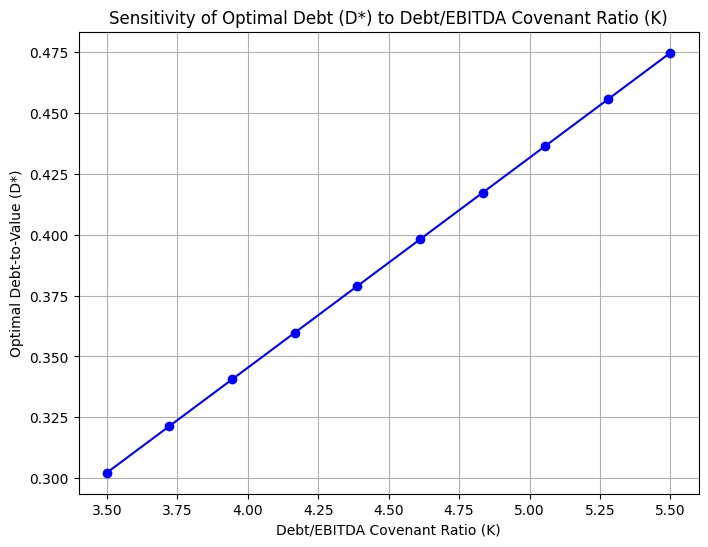

Condition violated: V_g^* >= 1 for computed V_g=1.0673928238418644 with parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.08777777777777776}
Condition violated: V_g^* >= 1 for computed V_g=1.1350975450071499 with parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.10333333333333332}
Condition violated: V_g^* >= 1 for computed V_g=1.1967117954251263 with parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.11888888888888886}
Condition violated: V_g^* >= 1 for computed V_g=1.2534850078111233 with parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.13444444444444442}
Condition violated: V_g^* >= 1 for computed V_g=1.3062983309714131 with parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0

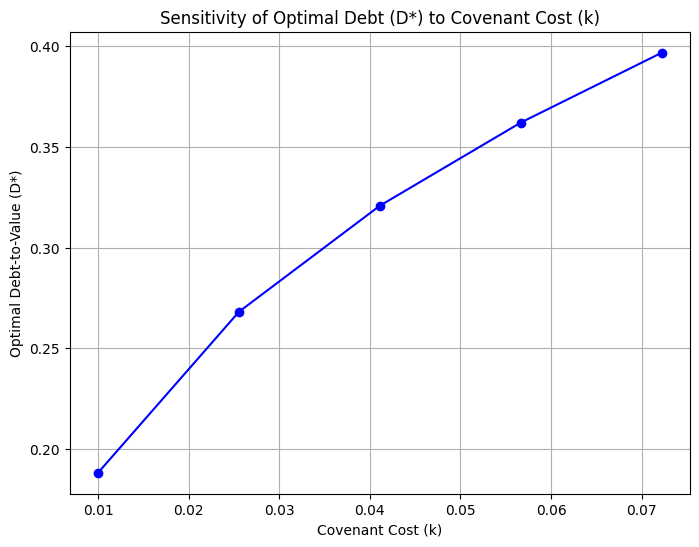

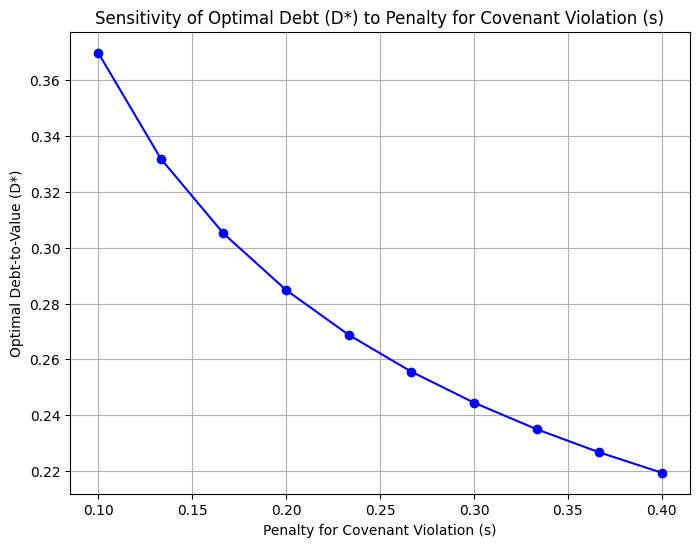

Condition violated: 2 * r <= sigma^2 for parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.28888888888888886, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.05}
Condition violated: 2 * r <= sigma^2 for parameters: {'V': 1.0, 'r': 0.04, 'tau': 0.21, 'sigma': 0.3, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.05}


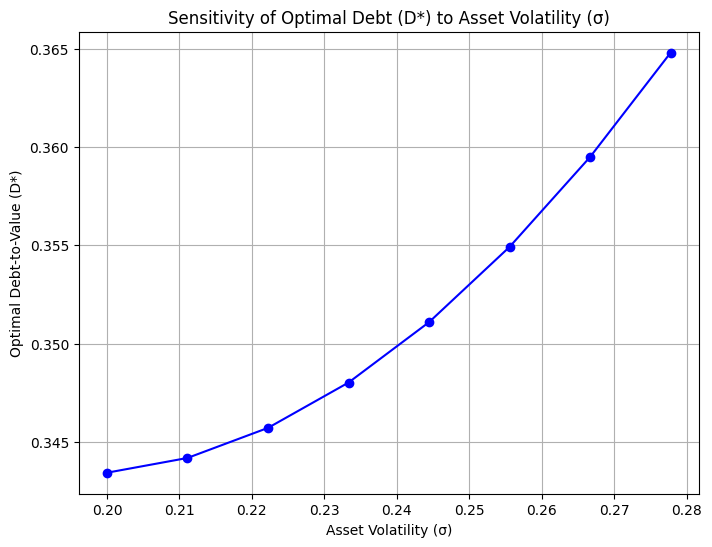

Condition violated: 2 * r <= sigma^2 for parameters: {'V': 1.0, 'r': 0.01, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.05}
Condition violated: 2 * r <= sigma^2 for parameters: {'V': 1.0, 'r': 0.014444444444444444, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.05}
Condition violated: 2 * r <= sigma^2 for parameters: {'V': 1.0, 'r': 0.01888888888888889, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.05}
Condition violated: 2 * r <= sigma^2 for parameters: {'V': 1.0, 'r': 0.02333333333333333, 'tau': 0.21, 'sigma': 0.22, 'C': 0.05, 'alpha': 0.1, 'K': 4, 's': 0.12, 'k': 0.05}


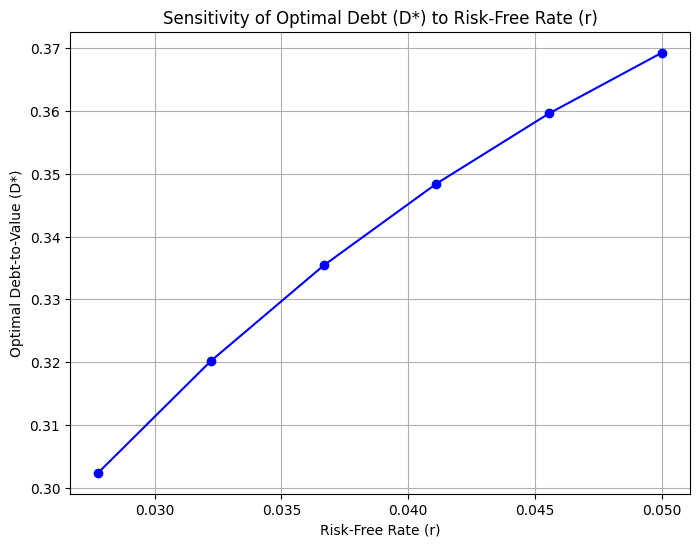

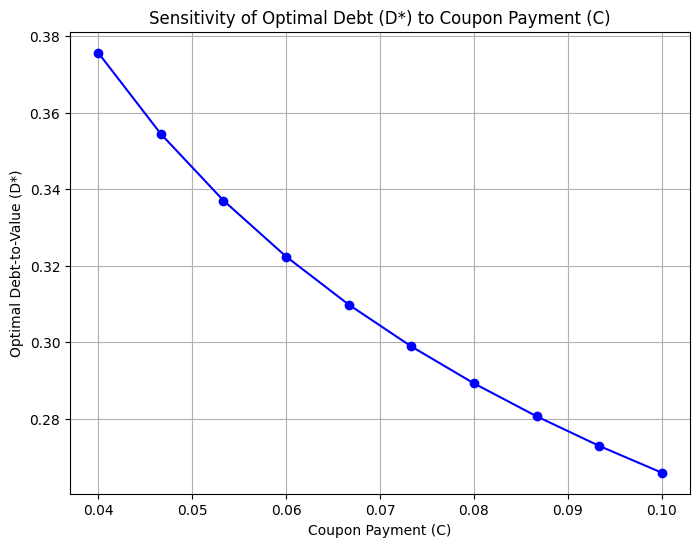

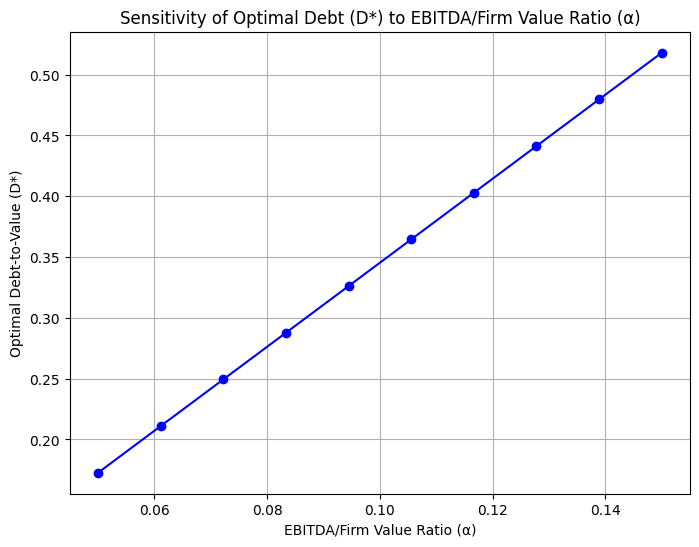

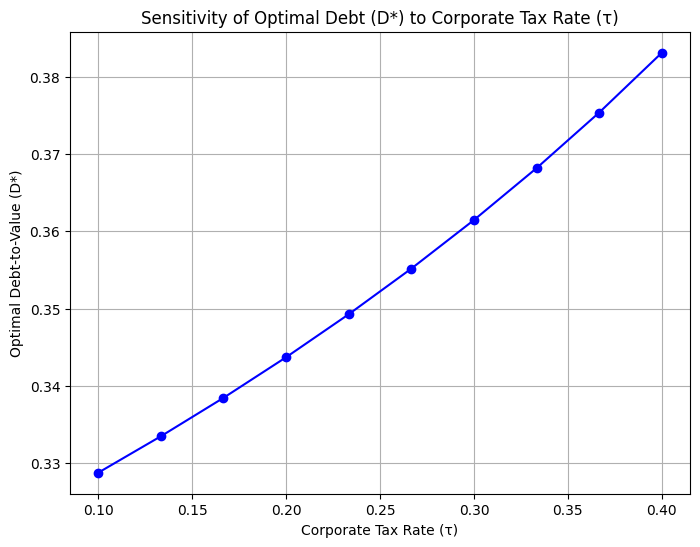

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define baseline parameters
baseline_params = {
    'V': 1.0,           # Normalized firm value
    'r': 0.04,          # Risk-free rate
    'tau': 0.21,        # Corporate tax rate
    'sigma': 0.22,      # Asset volatility
    'C': 0.05,          # Coupon payment
    'alpha': 0.1,       # EBITDA/firm value ratio
    'K': 4,             # Debt/EBITDA covenant ratio
    's': 0.12,          # Penalty for covenant violation
    'k': 0.05           # Covenant cost
}

# Function to compute x (depends on r and sigma)
def compute_x(params):
    return 2 * params['r'] / params['sigma']**2

# Function to compute V_g^* (covenant threshold)
def compute_V_g(params):
    x = compute_x(params)

    # Condition 2: Ensure 2r > sigma^2, if violated return NaN and print parameters
    if 2 * params['r'] <= params['sigma']**2:
        print(f"Condition violated: 2 * r <= sigma^2 for parameters: {params}")
        return np.nan

    V_g = params['V']**(x / (x + 1)) * ((params['k'] * params['r'] * (1 + x)) /
           (params['C'] * params['s'] * (1 - params['tau']) * x))**(1 / (x + 1))

    # Condition 1: Ensure V_g^* < 1, if violated return NaN and print parameters
    if V_g >= 1:
        print(f"Condition violated: V_g^* >= 1 for computed V_g={V_g} with parameters: {params}")
        return np.nan

    return V_g

# Function to compute D^* (optimal leverage ratio)
def compute_D(V_g, params):
    if np.isnan(V_g):
        return np.nan
    D = params['K'] * params['alpha'] * V_g
    return D

# Function to compute D^* based on varying a single parameter
def sensitivity_analysis(parameter_name, param_range, fixed_params):
    D_values = []
    for param_value in param_range:
        # Update the parameter value in the params dictionary
        params = fixed_params.copy()
        params[parameter_name] = param_value

        V_g_star = compute_V_g(params)
        D_star = compute_D(V_g_star, params)
        D_values.append(D_star)
    return D_values

# Plot sensitivity graphs
def plot_sensitivity(parameter_name, param_range, D_values, xlabel):
    plt.figure(figsize=(8, 6))
    plt.plot(param_range, D_values, marker='o', linestyle='-', color='b')
    plt.title(f'Sensitivity of Optimal Debt (D*) to {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel('Optimal Debt-to-Value (D*)')
    plt.grid(True)
    plt.show()

# Define ranges for sensitivity analysis for each parameter
K_range = np.linspace(3.5, 5.5, 10)         # Debt/EBITDA covenant ratio
k_range = np.linspace(0.01, 0.15, 10)    # Covenant cost
s_range = np.linspace(0.1, 0.4, 10)     # Penalty for covenant violation
sigma_range = np.linspace(0.2, 0.3, 10) # Asset volatility
r_range = np.linspace(0.01, 0.05, 10)   # Risk-free rate
C_range = np.linspace(0.04, 0.10, 10)   # Coupon payment
alpha_range = np.linspace(0.05, 0.15, 10) # EBITDA/Firm value ratio
tau_range = np.linspace(0.1, 0.4, 10)   # Corporate tax rate

# Perform sensitivity analysis for each parameter and plot the results
# For each parameter, we'll vary the parameter and hold others constant at baseline

# 1. Sensitivity to Debt/EBITDA covenant ratio (K)
D_values_K = sensitivity_analysis('K', K_range, baseline_params)
plot_sensitivity('K', K_range, D_values_K, 'Debt/EBITDA Covenant Ratio (K)')

# 2. Sensitivity to Covenant cost (k)
D_values_k = sensitivity_analysis('k', k_range, baseline_params)
plot_sensitivity('k', k_range, D_values_k, 'Covenant Cost (k)')

# 3. Sensitivity to Penalty for covenant violation (s)
D_values_s = sensitivity_analysis('s', s_range, baseline_params)
plot_sensitivity('s', s_range, D_values_s, 'Penalty for Covenant Violation (s)')

# 4. Sensitivity to Asset volatility (sigma)
D_values_sigma = sensitivity_analysis('sigma', sigma_range, baseline_params)
plot_sensitivity('sigma', sigma_range, D_values_sigma, 'Asset Volatility (σ)')

# 5. Sensitivity to Risk-free rate (r)
D_values_r = sensitivity_analysis('r', r_range, baseline_params)
plot_sensitivity('r', r_range, D_values_r, 'Risk-Free Rate (r)')

# 6. Sensitivity to Coupon payment (C)
D_values_C = sensitivity_analysis('C', C_range, baseline_params)
plot_sensitivity('C', C_range, D_values_C, 'Coupon Payment (C)')

# 7. Sensitivity to EBITDA/Firm value ratio (alpha)
D_values_alpha = sensitivity_analysis('alpha', alpha_range, baseline_params)
plot_sensitivity('alpha', alpha_range, D_values_alpha, 'EBITDA/Firm Value Ratio (α)')

# 8. Sensitivity to Corporate tax rate (tau)
D_values_tau = sensitivity_analysis('tau', tau_range, baseline_params)
plot_sensitivity('tau', tau_range, D_values_tau, 'Corporate Tax Rate (τ)')


